In [6]:
from pyspark.sql.functions import randn, rand, sum, col, round, lit
from pyspark.sql.types import StringType
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
import numpy as np
import time
import pandas as pd
import datetime 
print(datetime.datetime.now())
import matplotlib.pyplot as plt

sc = SparkContext('local')
spark = SparkSession(sc)

### Import Data

In [7]:
df19v1 = spark.read.csv('../data/pluto.csv', header=True)
df18v2_1 = spark.read.csv('../data/pluto_18v2_1.csv', header=True)
df18v1 = spark.read.csv('../data/pluto_18v1.csv', header=True)

In [8]:
df19v1 = df19v1.withColumn('exemptland', lit(None).cast(StringType()))

### convert column names all to lower case

In [9]:
df18v1 = df18v1.select([col(A).alias(A.lower()) for A in df18v1.schema.names])
df18v2_1 = df18v2_1.select([col(A).alias(A.lower()) for A in df18v2_1.schema.names])
df19v1 = df19v1.select([col(A).alias(A.lower()) for A in df19v1.schema.names])

In [10]:
cols = df18v1.columns

In [12]:
df18v1 = df18v1.select(cols)
df18v2_1 = df18v2_1.select(cols)
df19v1 = df19v1.select(cols)
df19v1 = df19v1.drop(df19v1.version).withColumn('version', lit('19v1'))
df18v1 = df18v1.drop(df18v1.version).withColumn('version', lit('18v1'))
df18v2_1 = df18v2_1.drop(df18v2_1.version).withColumn('version', lit('18v2.1'))

In [13]:
df =df19v1.union(df18v2_1).union(df18v1)

In [14]:
start_time = time.time()
summary = df.groupBy("version").agg(sum("unitsres"),
                                    sum("lotarea"),
                                    sum("bldgarea"),
                                    sum("comarea"),
                                    sum("resarea"),
                                    sum("officearea"),
                                    sum("retailarea"),
                                    sum("garagearea"),
                                    sum("strgearea"),
                                    sum("factryarea"),
                                    sum("otherarea"),
                                    sum("assessland"),
                                    sum("assesstot"),
                                    sum("exemptland"),
                                    sum("exempttot"),
                                    sum("firm07_flag"),
                                    sum("pfirm15_flag")).toPandas()
elapsed_time = time.time() - start_time

In [15]:
elapsed_time

57.63214588165283

In [19]:
agg_cols = ['version','UnitsRes','LotArea','BldgArea','ComArea',
 'ResArea','OfficeArea','RetailArea','GarageArea',
 'StrgeArea','FactryArea','OtherArea','AssessLand',
 'AssessTot','ExemptLand','ExemptTot','FIRM07_FLAG',
 'PFIRM15_FLAG']

In [20]:
summary.columns = agg_cols

In [21]:
summary

,version,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG
0,18v1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,116348116.0,524094223.0,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0
1,18v2.1,3572157.0,6.813542e+09,5.504286e+09,1.820455e+09,3.477582e+09,654410227.0,276896354.0,120942956.0,100257225.0,116612843.0,524200834.0,9.782664e+10,3.936520e+11,4.456274e+10,1.446245e+11,34683.0,65688.0
2,19v1,3672400.0,6.779098e+09,5.653129e+09,1.826757e+09,3.488915e+09,658083625.0,276478137.0,121189885.0,99740459.0,116553134.0,527118742.0,1.137527e+11,4.766000e+11,NaN,1.665695e+11,34951.0,65712.0


In [22]:
summary.to_csv('19v1-18v2.1-18v1-aggregate_value_comparison.csv')

In [23]:
summary

,version,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG
0,18v1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,116348116.0,524094223.0,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0
1,18v2.1,3572157.0,6.813542e+09,5.504286e+09,1.820455e+09,3.477582e+09,654410227.0,276896354.0,120942956.0,100257225.0,116612843.0,524200834.0,9.782664e+10,3.936520e+11,4.456274e+10,1.446245e+11,34683.0,65688.0
2,19v1,3672400.0,6.779098e+09,5.653129e+09,1.826757e+09,3.488915e+09,658083625.0,276478137.0,121189885.0,99740459.0,116553134.0,527118742.0,1.137527e+11,4.766000e+11,NaN,1.665695e+11,34951.0,65712.0


In [41]:
summary.index = summary.version
# summary = summary.reindex(['18v1', '18V2_1', '19v1'])

In [42]:
summary

,version,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG
version,,,,,,,,,,,,,,,,,,
18v1,18v1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,116348116.0,524094223.0,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0
18v2.1,18v2.1,3572157.0,6.813542e+09,5.504286e+09,1.820455e+09,3.477582e+09,654410227.0,276896354.0,120942956.0,100257225.0,116612843.0,524200834.0,9.782664e+10,3.936520e+11,4.456274e+10,1.446245e+11,34683.0,65688.0
19v1,19v1,3672400.0,6.779098e+09,5.653129e+09,1.826757e+09,3.488915e+09,658083625.0,276478137.0,121189885.0,99740459.0,116553134.0,527118742.0,1.137527e+11,4.766000e+11,NaN,1.665695e+11,34951.0,65712.0


In [43]:
summary_pct = summary.iloc[:, 1:].pct_change()

In [44]:
summary_pct

,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG
version,,,,,,,,,,,,,,,,,
18v1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18v2.1,0.004580,-0.000332,0.003559,0.002297,0.002126,0.002208,0.001837,-0.011953,-0.019614,0.002275,0.000203,0.000281,-0.004904,0.009525,0.016995,0.003501,0.001067
19v1,0.028062,-0.005055,0.027041,0.003462,0.003259,0.005613,-0.001510,0.002042,-0.005154,-0.000512,0.005566,0.162799,0.210714,0.000000,0.151738,0.007727,0.000365


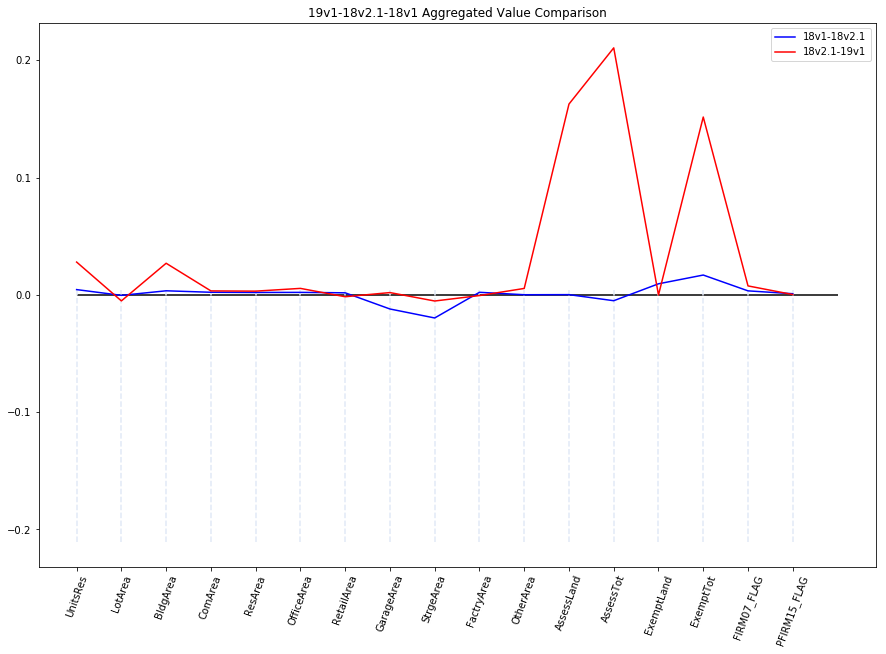

In [47]:
plt.figure(figsize=(15, 10))
plt.plot(range(17), summary_pct.iloc[1, :], color = 'blue', label='18v1-18v2.1')
plt.plot(range(17), summary_pct.iloc[2, :], color = 'red', label='18v2.1-19v1')
plt.hlines(0, 0, 17, color = 'black')
for i in range(17):
    plt.vlines(i, min(-summary_pct.iloc[2, :]), max(-summary_pct.iloc[2, :]), color = '#e1e9f7', linestyles='dashed')
plt.xticks(range(17), summary_pct.columns, rotation=70)
plt.title('19v1-18v2.1-18v1 Aggregated Value Comparison')
plt.legend()
plt.savefig('19v1-18v2.1-18v1-Aggregated_Value_Comparison.png', bbox_inches='tight')
plt.show()

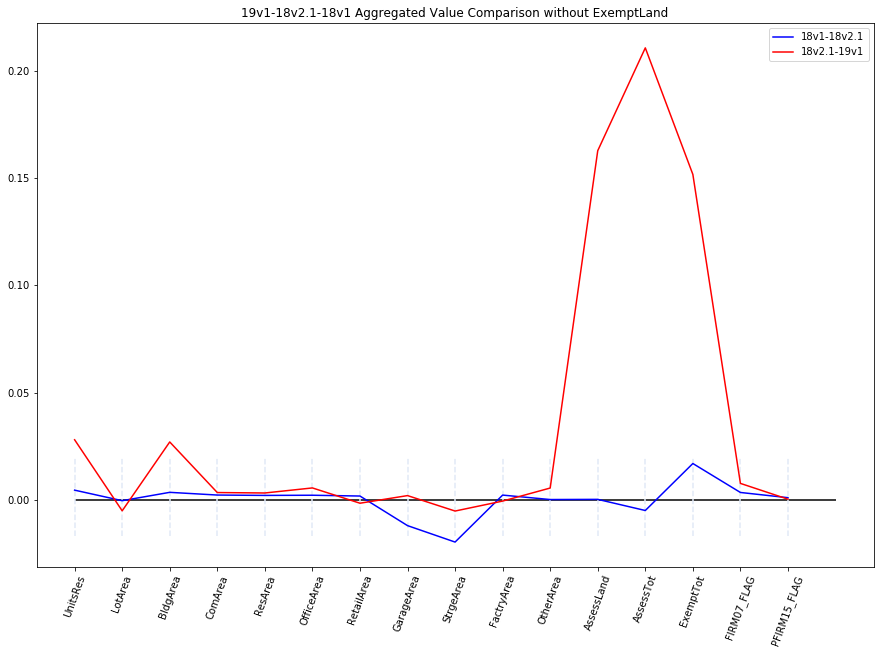

In [48]:
plt.figure(figsize=(15, 10))
summary_pct = summary_pct.drop(['ExemptLand'], axis=1)
plt.plot(range(16), summary_pct.iloc[1, :], color = 'blue', label='18v1-18v2.1')
plt.plot(range(16), summary_pct.iloc[2, :], color = 'red', label='18v2.1-19v1')
plt.hlines(0, 0, 16, color = 'black')
for i in range(16):
    plt.vlines(i, min(-summary_pct.iloc[1, :]), max(-summary_pct.iloc[1, :]), color = '#e1e9f7', linestyles='dashed')
plt.xticks(range(16), summary_pct.columns, rotation=70)
plt.title('19v1-18v2.1-18v1 Aggregated Value Comparison without ExemptLand')
plt.legend()
plt.savefig('19v1-18v2.1-18v1_Aggregated_Value_Comparison_wo_ExemptLand.png', bbox_inches='tight')
plt.show()

# Condo

In [31]:
condo = df.filter(df['lot'].rlike(r'^75'))

In [32]:
start_time = time.time()
condo_summary = condo.groupBy("version").agg(sum("unitsres"),
                                    sum("lotarea"),
                                    sum("bldgarea"),
                                    sum("comarea"),
                                    sum("resarea"),
                                    sum("officearea"),
                                    sum("retailarea"),
                                    sum("garagearea"),
                                    sum("strgearea"),
                                    sum("factryarea"),
                                    sum("otherarea"),
                                    sum("assessland"),
                                    sum("assesstot"),
                                    sum("exempttot"),
                                    sum("firm07_flag"),
                                    sum("pfirm15_flag")).toPandas()
elapsed_time = time.time() - start_time

In [33]:
condo_summary.index = condo_summary.version
condo_summary_pct = condo_summary.iloc[:, 1:].pct_change()
condo_summary_pct

,sum(unitsres),sum(lotarea),sum(bldgarea),sum(comarea),sum(resarea),sum(officearea),sum(retailarea),sum(garagearea),sum(strgearea),sum(factryarea),sum(otherarea),sum(assessland),sum(assesstot),sum(exempttot),sum(firm07_flag),sum(pfirm15_flag)
version,,,,,,,,,,,,,,,,
18v1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18v2.1,0.089811,0.000895,0.042926,0.006184,0.012011,0.023733,0.011243,0.019199,-0.061308,-0.322279,-0.048891,0.048036,0.022583,0.074171,0.045089,0.038752
19v1,0.010970,0.016673,0.153330,-0.009182,0.009596,-0.016491,-0.012351,0.003685,-0.002074,-0.064473,0.021144,0.042363,0.090783,0.055398,0.010786,0.010919


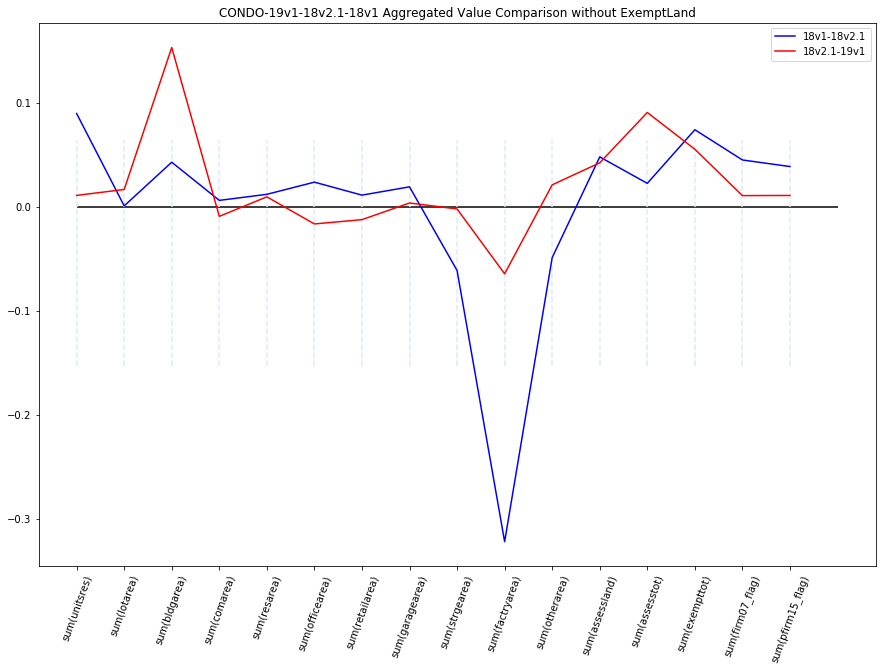

In [35]:
plt.figure(figsize=(15, 10))
plt.plot(range(16), condo_summary_pct.iloc[1, :], color = 'blue', label='18v1-18v2.1')
plt.plot(range(16), condo_summary_pct.iloc[2, :], color = 'red', label='18v2.1-19v1')
plt.hlines(0, 0, 16, color = 'black')
for i in range(16):
    plt.vlines(i, min(-condo_summary_pct.iloc[2, :]), max(-condo_summary_pct.iloc[2, :]), color = '#e1e9f7', linestyles='dashed')
plt.xticks(range(16), condo_summary_pct.columns, rotation=70)
plt.title('CONDO-19v1-18v2.1-18v1 Aggregated Value Comparison without ExemptLand')
plt.legend()
plt.savefig('CONDO-19v1-18v2.1-18v1_Aggregated_Value_Comparison_wo_ExemptLand.png', bbox_inches='tight')
plt.show()

In [1]:
import os

os.system('jupyter nbconvert --to html pluto_aggregate_analysis_19v1.ipynb')

0